## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Importing Dataset

In [2]:
movie=pd.read_csv("C:\\Users\\hp\\Downloads\\movies.dat",sep='\t',encoding='latin-1',header=None)
movie.columns =['MovieIDs','MovieName','Category']
movie.dropna(inplace=True)

In [3]:
movie.head()

,MovieIDs,MovieName,Category
0,1,Toy Story (1995),Animation
1,2,Jumanji (1995),Adventure
2,3,Grumpier Old Men (1995),Comedy
3,4,Waiting to Exhale (1995),Comedy
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings=pd.read_csv("C:\\Users\\hp\\Documents\\DataSet\\ratings.dat",sep='::',header=None,names=['UserId','MovieIDs','Rating','Timestamp'])
users=pd.read_csv("C:\\Users\\hp\\Documents\\DataSet\\users.dat",sep='::',header=None,names=['UserId','Gender','Age','Occupation','Zip-code'])

C:\Users\hp\AppData\Local\Temp\ipykernel_15336\3643769440.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings=pd.read_csv("C:\\Users\\hp\\Documents\\DataSet\\ratings.dat",sep='::',header=None,names=['UserId','MovieIDs','Rating','Timestamp'])
C:\Users\hp\AppData\Local\Temp\ipykernel_15336\3643769440.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users=pd.read_csv("C:\\Users\\hp\\Documents\\DataSet\\users.dat",sep='::',header=None,names=['UserId','Gender','Age','Occupation','Zip-code'])


In [5]:
print(ratings.head())
print(users.head())

   UserId  MovieIDs  Rating  Timestamp
0       1      1193       5  978300760
1       1       661       3  978302109
2       1       914       3  978301968
3       1      3408       4  978300275
4       1      2355       5  978824291
   UserId Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455


In [6]:
movie.drop_duplicates(subset="MovieIDs",keep=False, inplace=True)

In [7]:
df1=pd.merge(ratings,users[['UserId','Gender','Age','Occupation']],on='UserId',how='inner')
df1.head(6)

,UserId,MovieIDs,Rating,Timestamp,Gender,Age,Occupation
0,1,1193,5,978300760,F,1,10
1,1,661,3,978302109,F,1,10
2,1,914,3,978301968,F,1,10
3,1,3408,4,978300275,F,1,10
4,1,2355,5,978824291,F,1,10
5,1,1197,3,978302268,F,1,10


In [8]:
movies=pd.merge(df1[['UserId','MovieIDs','Rating','Gender','Age','Occupation']],movie[['MovieIDs','MovieName','Category']],on='MovieIDs',how='inner')
movies.head(4)

,UserId,MovieIDs,Rating,Gender,Age,Occupation,MovieName,Category
0,1,1193,5,F,1,10,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,M,56,16,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,M,25,12,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,M,25,7,One Flew Over the Cuckoo's Nest (1975),Drama


In [9]:
movies.tail()

,UserId,MovieIDs,Rating,Gender,Age,Occupation,MovieName,Category
1000204,5949,2198,5,M,18,17,Modulations (1998),Documentary
1000205,5675,2703,3,M,35,14,Broken Vessels (1998),Drama
1000206,5780,2845,1,M,18,17,White Boys (1999),Drama
1000207,5851,3607,5,F,18,20,One Little Indian (1973),Comedy
1000208,5938,2909,4,M,25,1,"Five Wives, Three Secretaries and Me (1998)",Documentary


In [10]:
movies['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

## Exploratory Data Analysis

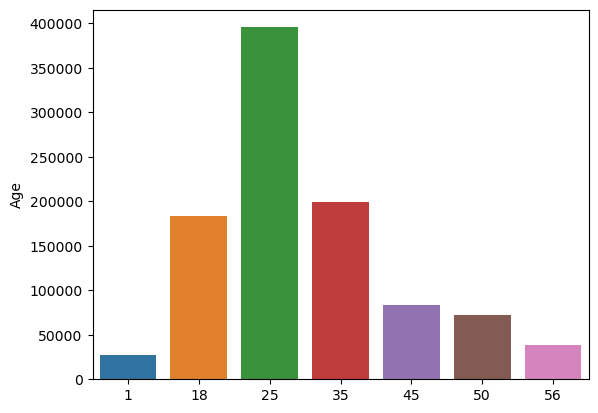

In [11]:
sns.barplot( x=[25,35,18,45,50,56,1],y= movies['Age'].value_counts(), data= movies)
plt.show()

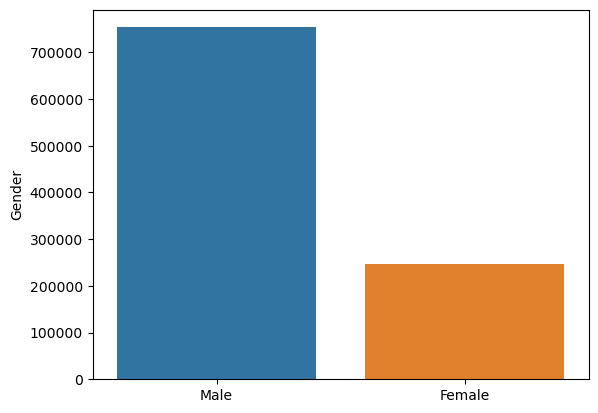

In [12]:
sns.barplot(x= ['Male','Female'], y= movies['Gender'].value_counts(),data = movies)
plt.show()

In [13]:
movies['Gender'].value_counts()

M    753769
F    246440
Name: Gender, dtype: int64

In [14]:
movies['Category'].value_counts()

Comedy                 267731
Action                 261549
Drama                  213234
Adventure               46998
Horror                  45643
Crime                   37296
Animation               35076
Children's              20278
Thriller                17791
Sci-Fi                  11429
Film-Noir                9343
Mystery                  9241
Musical                  7112
Documentary              6112
Western                  5689
Romance                  2990
War                       991
Fantasy                   790
comedy                    766
 Miami Beach (1988)       150
Name: Category, dtype: int64

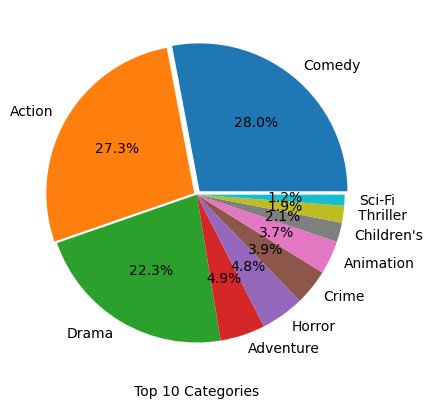

In [15]:
explode= [0.03,0.02,0,0,0,0,0,0,0,0]
plt.pie(movies['Category'].value_counts()[:10],labels= movies['Category'].value_counts()[:10].keys() ,autopct= '%0.1f%%',explode=explode)
plt.xlabel('Top 10 Categories')
plt.show()

In [16]:
movies['Rating'].value_counts()

4    348971
3    261197
5    226310
2    107557
1     56174
Name: Rating, dtype: int64

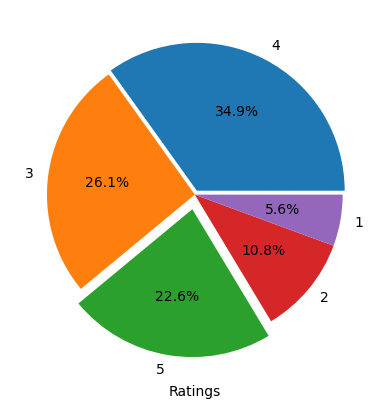

In [17]:
explode= [0.03,0,0.1,0,0]
plt.pie(movies['Rating'].value_counts(),labels= movies['Rating'].value_counts().keys() ,autopct= '%0.1f%%',explode=explode)
plt.xlabel('Ratings')
plt.show()

In [18]:
Top_Ratings= movies[movies['Rating']==5]
Top_Ratings.head()

,UserId,MovieIDs,Rating,Gender,Age,Occupation,MovieName,Category
0,1,1193,5,F,1,10,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,M,56,16,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,M,50,1,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,M,1,10,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,F,25,7,One Flew Over the Cuckoo's Nest (1975),Drama


In [19]:
Top_Ratings.shape

(226310, 8)

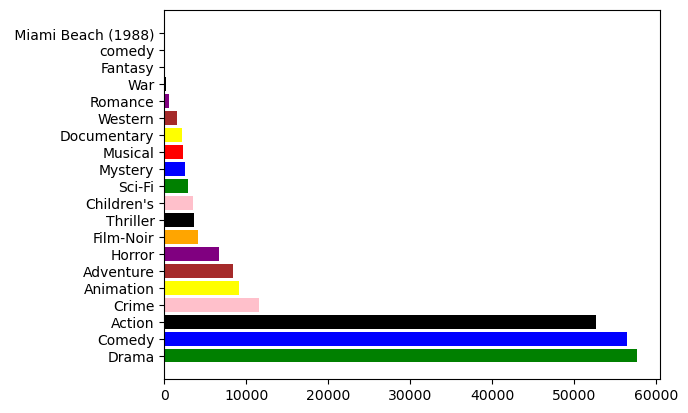

In [20]:
plt.barh(Top_Ratings['Category'].value_counts().keys(),Top_Ratings['Category'].value_counts(),color=['g','b','black','pink','yellow','brown','purple','orange','black','pink','g','b','r','yellow','brown','purple','black','pink'])
plt.show()

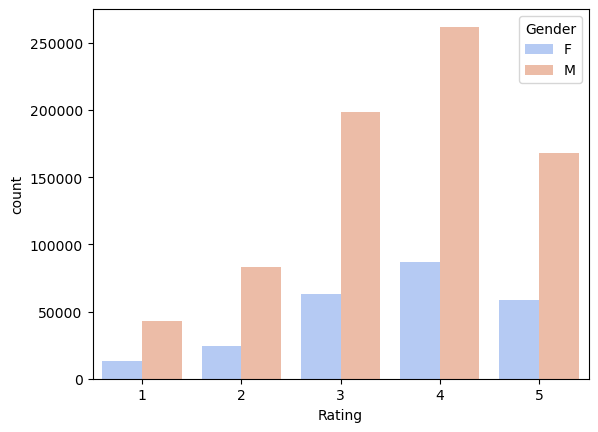

In [21]:
sns.countplot(x='Rating',data=movies,hue='Gender',palette='coolwarm')
plt.show()

In [22]:
 movies.shape

(1000209, 8)

In [23]:
movies.tail()

,UserId,MovieIDs,Rating,Gender,Age,Occupation,MovieName,Category
1000204,5949,2198,5,M,18,17,Modulations (1998),Documentary
1000205,5675,2703,3,M,35,14,Broken Vessels (1998),Drama
1000206,5780,2845,1,M,18,17,White Boys (1999),Drama
1000207,5851,3607,5,F,18,20,One Little Indian (1973),Comedy
1000208,5938,2909,4,M,25,1,"Five Wives, Three Secretaries and Me (1998)",Documentary


In [24]:
movies.sort_values(by='UserId',ascending=True)


,UserId,MovieIDs,Rating,Gender,Age,Occupation,MovieName,Category
0,1,1193,5,F,1,10,One Flew Over the Cuckoo's Nest (1975),Drama
28501,1,48,5,F,1,10,Pocahontas (1995),Animation
13819,1,938,4,F,1,10,Gigi (1958),Musical
51327,1,1207,4,F,1,10,To Kill a Mockingbird (1962),Drama
31152,1,1721,4,F,1,10,Titanic (1997),Drama
...,...,...,...,...,...,...,...,...
578459,6040,2641,2,M,25,6,Superman II (1980),Action
338950,6040,1947,4,M,25,6,West Side Story (1961),Musical
464888,6040,904,4,M,25,6,Rear Window (1954),Mystery
632232,6040,2664,4,M,25,6,Invasion of the Body Snatchers (1956),Horror


In [25]:
m1= movies

In [26]:
m1['Age Group']=np.nan

In [27]:
m1.head()

,UserId,MovieIDs,Rating,Gender,Age,Occupation,MovieName,Category,Age Group
0,1,1193,5,F,1,10,One Flew Over the Cuckoo's Nest (1975),Drama,NaN
1,2,1193,5,M,56,16,One Flew Over the Cuckoo's Nest (1975),Drama,NaN
2,12,1193,4,M,25,12,One Flew Over the Cuckoo's Nest (1975),Drama,NaN
3,15,1193,4,M,25,7,One Flew Over the Cuckoo's Nest (1975),Drama,NaN
4,17,1193,5,M,50,1,One Flew Over the Cuckoo's Nest (1975),Drama,NaN


In [28]:
m1.loc[m1['Age'] ==1, 'Age Group'] = 'Under 18'
m1.loc[m1['Age'] ==18, 'Age Group'] = '18-24'
m1.loc[m1['Age'] ==25, 'Age Group'] = '25-34'
m1.loc[m1['Age']==35, 'Age Group'] = '35-44'
m1.loc[m1['Age'] ==45, 'Age Group'] = '45-49'
m1.loc[m1['Age'] ==50, 'Age Group'] = '50-55'
m1.loc[m1['Age']==56, 'Age Group'] = '56+'

In [29]:
m1.head()

,UserId,MovieIDs,Rating,Gender,Age,Occupation,MovieName,Category,Age Group
0,1,1193,5,F,1,10,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
1,2,1193,5,M,56,16,One Flew Over the Cuckoo's Nest (1975),Drama,56+
2,12,1193,4,M,25,12,One Flew Over the Cuckoo's Nest (1975),Drama,25-34
3,15,1193,4,M,25,7,One Flew Over the Cuckoo's Nest (1975),Drama,25-34
4,17,1193,5,M,50,1,One Flew Over the Cuckoo's Nest (1975),Drama,50-55


In [30]:
m1.isna().sum()

UserId        0
MovieIDs      0
Rating        0
Gender        0
Age           0
Occupation    0
MovieName     0
Category      0
Age Group     0
dtype: int64

In [31]:
m1.describe(include='all')

,UserId,MovieIDs,Rating,Gender,Age,Occupation,MovieName,Category,Age Group
count,1.000209e+06,1.000209e+06,1.000209e+06,1000209,1.000209e+06,1.000209e+06,1000209,1000209,1000209
unique,NaN,NaN,NaN,2,NaN,NaN,3688,20,7
top,NaN,NaN,NaN,M,NaN,NaN,Star Wars,Comedy,25-34
freq,NaN,NaN,NaN,753769,NaN,NaN,11114,267731,395556
mean,3.024512e+03,1.865540e+03,3.581564e+00,NaN,2.973831e+01,8.036138e+00,NaN,NaN,NaN
std,1.728413e+03,1.096041e+03,1.117102e+00,NaN,1.175198e+01,6.531336e+00,NaN,NaN,NaN
min,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,1.506000e+03,1.030000e+03,3.000000e+00,NaN,2.500000e+01,2.000000e+00,NaN,NaN,NaN
50%,3.070000e+03,1.835000e+03,4.000000e+00,NaN,2.500000e+01,7.000000e+00,NaN,NaN,NaN
75%,4.476000e+03,2.770000e+03,4.000000e+00,NaN,3.500000e+01,1.400000e+01,NaN,NaN,NaN


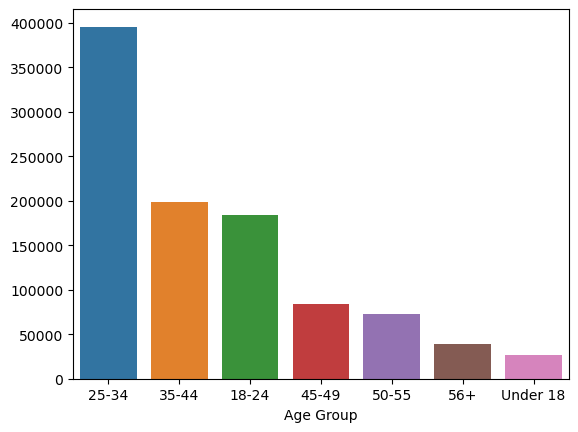

In [32]:
sns.barplot(x=movies['Age Group'].value_counts().keys(),y=movies['Age Group'].value_counts(),data=m1)
plt.xlabel('Age Group')
plt.ylabel('')
plt.show()

In [33]:
m2= m1.groupby('MovieName')['Rating'].agg('mean')

In [34]:
top_15_movies=m2.nlargest(15)
top_15_movies

MovieName
Baby, The (1973)                                                       5.000000
Bittersweet Motel (2000)                                               5.000000
Follow the Bitch (1998)                                                5.000000
Gate of Heavenly Peace, The (1995)                                     5.000000
Lured (1947)                                                           5.000000
One Little Indian (1973)                                               5.000000
Schlafes Bruder (Brother of Sleep) (1995)                              5.000000
Smashing Time (1967)                                                   5.000000
Song of Freedom (1936)                                                 5.000000
Ulysses (Ulisse) (1954)                                                5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                    4.800000
Lamerica (1994)                                                        4.750000
Apple, The (Sib) (1998)       

[Text(0, 0, 'Baby, The (1973)'),
 Text(1, 0, 'Bittersweet Motel (2000)'),
 Text(2, 0, 'Follow the Bitch (1998)'),
 Text(3, 0, 'Gate of Heavenly Peace, The (1995)'),
 Text(4, 0, 'Lured (1947)'),
 Text(5, 0, 'One Little Indian (1973)'),
 Text(6, 0, 'Schlafes Bruder (Brother of Sleep) (1995)'),
 Text(7, 0, 'Smashing Time (1967)'),
 Text(8, 0, 'Song of Freedom (1936)'),
 Text(9, 0, 'Ulysses (Ulisse) (1954)'),
 Text(10, 0, 'I Am Cuba (Soy Cuba/Ya Kuba) (1964)'),
 Text(11, 0, 'Lamerica (1994)'),
 Text(12, 0, 'Apple, The (Sib) (1998)'),
 Text(13, 0, 'Sanjuro (1962)'),
 Text(14, 0, 'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)')]

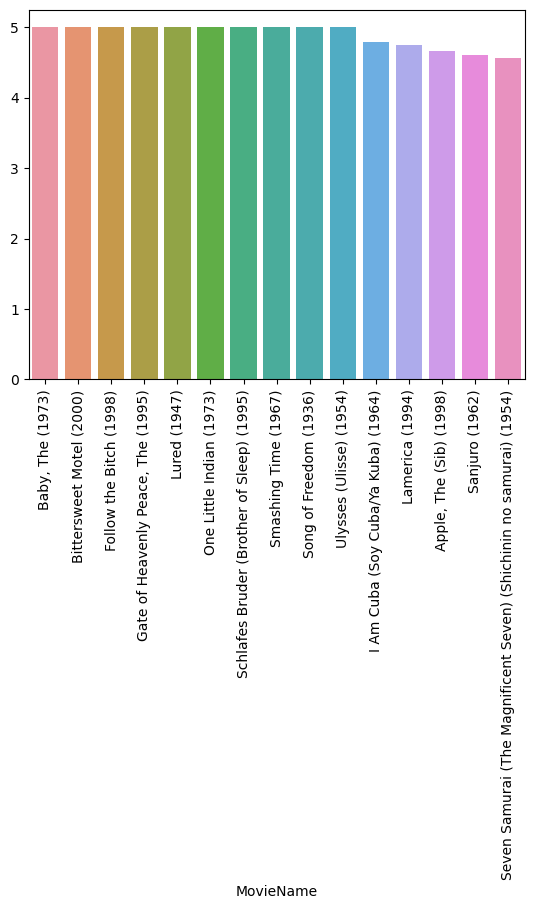

In [35]:
plot1=sns.barplot(x=top_15_movies.nlargest(15).index,y=top_15_movies.nlargest(15).values)
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90)

In [36]:
mm1=movies[['Rating', 'Gender', 'Age Group', 'Occupation']]

In [37]:
mm1['Occupation'].value_counts()

4     131032
0     130499
7     105425
1      85351
17     72816
20     60397
12     57214
2      50068
14     49109
16     46021
6      37205
3      31623
10     23290
15     22951
5      21850
11     20563
19     14904
13     13754
18     12086
9      11345
8       2706
Name: Occupation, dtype: int64

## Data Preprocessing

In [38]:
dataset=mm1.iloc[0:500,]
X=dataset.iloc[:,[1,2,3]]
Y=dataset.iloc[:,0]

In [39]:
x1=pd.get_dummies(data=X)

In [40]:
x2=pd.get_dummies(X['Occupation'],prefix='Occupation')

In [41]:
x=pd.concat([x1,x2],axis=1)

In [42]:
x.columns


Index(['Occupation', 'Gender_F', 'Gender_M', 'Age Group_18-24',
       'Age Group_25-34', 'Age Group_35-44', 'Age Group_45-49',
       'Age Group_50-55', 'Age Group_56+', 'Age Group_Under 18',
       'Occupation_0', 'Occupation_1', 'Occupation_2', 'Occupation_3',
       'Occupation_4', 'Occupation_5', 'Occupation_6', 'Occupation_7',
       'Occupation_8', 'Occupation_9', 'Occupation_10', 'Occupation_11',
       'Occupation_12', 'Occupation_13', 'Occupation_14', 'Occupation_15',
       'Occupation_16', 'Occupation_17', 'Occupation_18', 'Occupation_19',
       'Occupation_20'],
      dtype='object')

In [43]:
x.drop(['Occupation','Gender_F','Age Group_56+','Occupation_20'],axis=1,inplace = True)

In [44]:
x.head()

,Gender_M,Age Group_18-24,Age Group_25-34,Age Group_35-44,Age Group_45-49,Age Group_50-55,Age Group_Under 18,Occupation_0,Occupation_1,Occupation_2,...,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
Y.head()

0    5
1    5
2    4
3    4
4    5
Name: Rating, dtype: int64

In [46]:
first_500 = movies[500:]
first_500.dropna(inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_15336\3157616624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_500.dropna(inplace=True)


##  Model Training

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test= train_test_split(x,Y,test_size=0.3,random_state=6)

In [50]:
x_train[0:5]

,Gender_M,Age Group_18-24,Age Group_25-34,Age Group_35-44,Age Group_45-49,Age Group_50-55,Age Group_Under 18,Occupation_0,Occupation_1,Occupation_2,...,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19
497,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
299,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
338,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
222,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
148,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
scoring='accuracy'

## Model Prediction

In [52]:
models=[]
models.append(('lr',LogisticRegression()))
models.append(('dtc',DecisionTreeClassifier()))
models.append(('nbr',KNeighborsClassifier()))
models.append(('nb',GaussianNB()))
models.append(('svm',SVC()))
results=[]
names=[]
for name, model in models:
    kfold= model_selection.KFold()
    cv_results=model_selection.cross_val_score(model,x_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg='%s:%f(%f)' %(name, cv_results.mean(),cv_results.std())
    print(msg)

lr:0.491429(0.064270)
dtc:0.402857(0.064143)
nbr:0.420000(0.072054)
nb:0.134286(0.042952)
svm:0.528571(0.069400)
